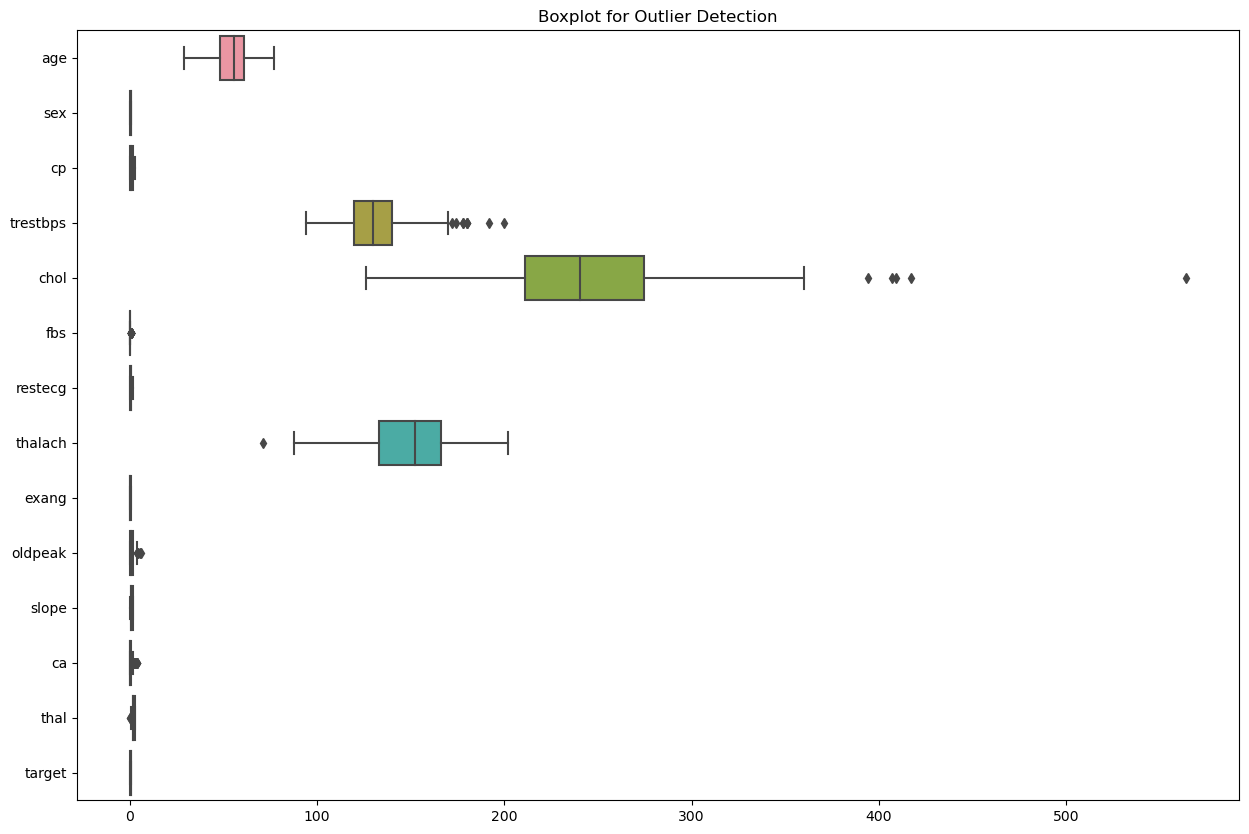


Logistic Regression Evaluation:
Accuracy: 85.9649%
Confusion Matrix:
[[21  5]
 [ 3 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



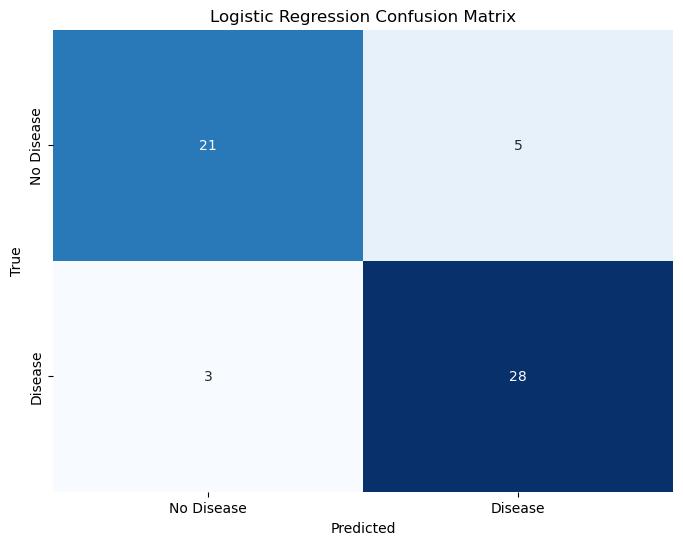


Decision Tree Evaluation:
Accuracy: 71.9298%
Confusion Matrix:
[[18  8]
 [ 8 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        26
           1       0.74      0.74      0.74        31

    accuracy                           0.72        57
   macro avg       0.72      0.72      0.72        57
weighted avg       0.72      0.72      0.72        57



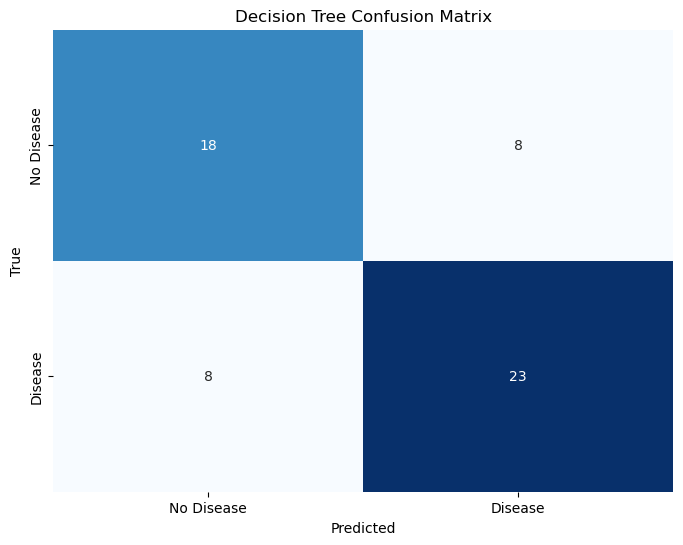

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'heart.csv'
df = pd.read_csv(dataset_path)

# Check for duplicates
duplicates = df[df.duplicated()]
if not duplicates.empty:
    df = df.drop_duplicates()

# Check for outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

# Remove outliers (you may customize this based on your observations from the boxplot)
outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Split the data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate models
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    
    print(f'\n{model_name} Evaluation:')
    print(f'Accuracy: {accuracy * 100:.4f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Logistic Regression model
evaluate_model(logreg_predictions, 'Logistic Regression')

# Evaluate Decision Tree model
evaluate_model(dt_predictions, 'Decision Tree')


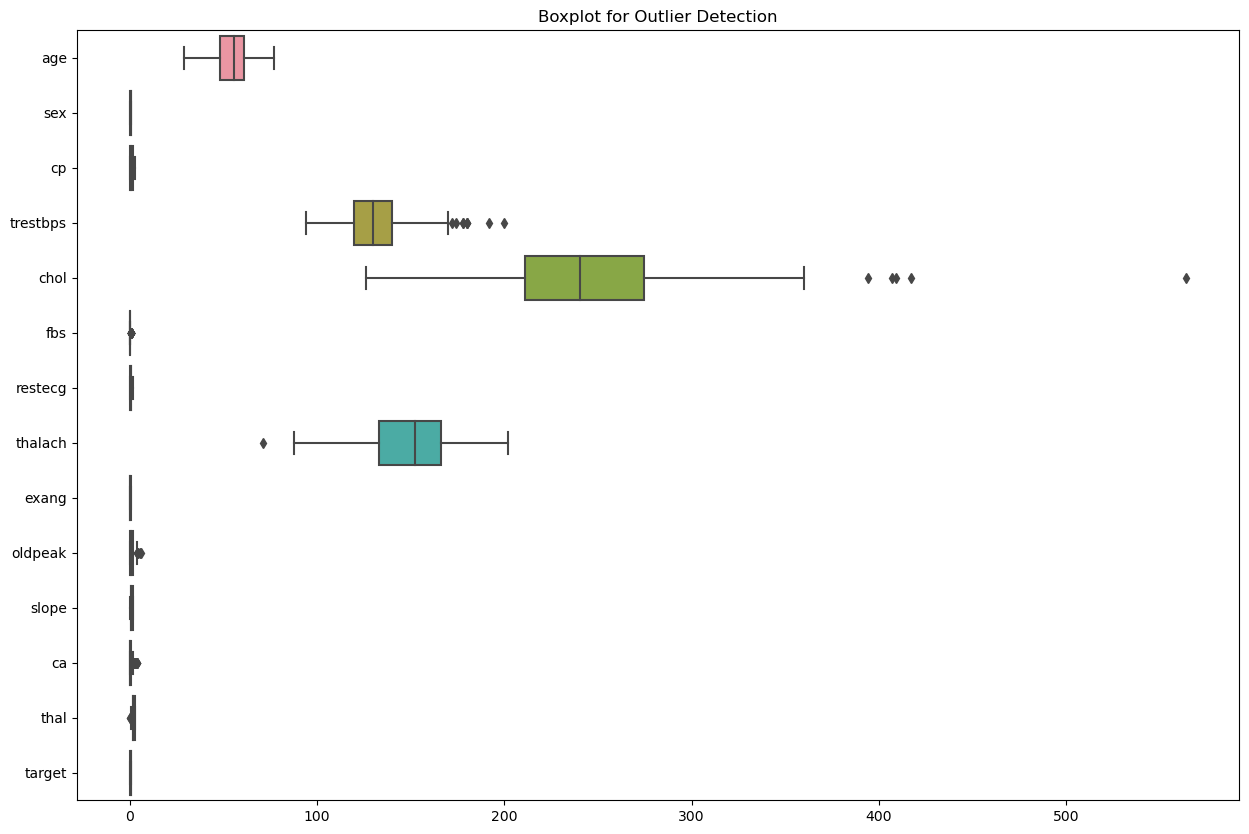


Tuned Logistic Regression Evaluation:
Accuracy: 85.9649%
Confusion Matrix:
[[21  5]
 [ 3 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.85      0.90      0.88        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



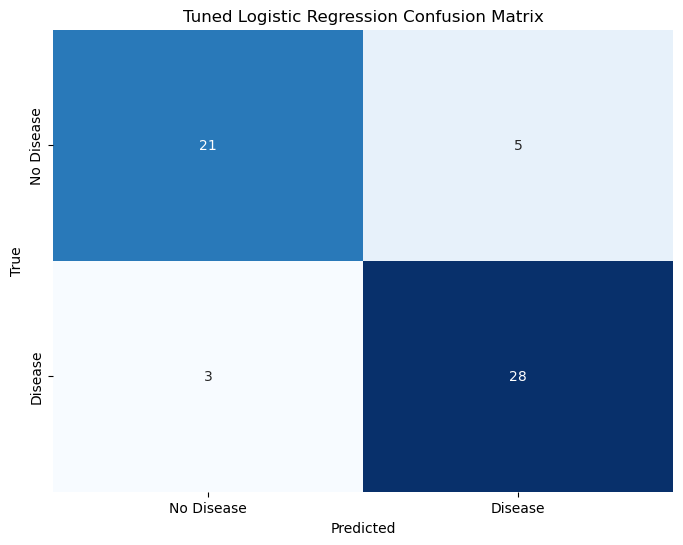


Tuned Decision Tree Evaluation:
Accuracy: 73.6842%
Confusion Matrix:
[[18  8]
 [ 7 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.75      0.77      0.76        31

    accuracy                           0.74        57
   macro avg       0.73      0.73      0.73        57
weighted avg       0.74      0.74      0.74        57



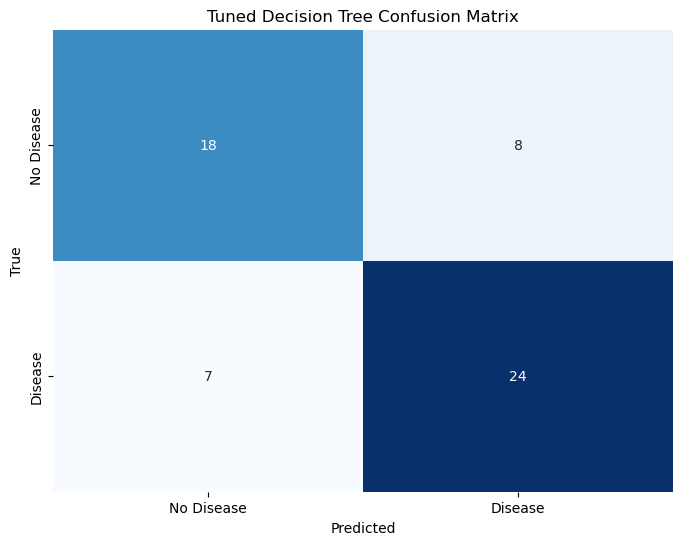

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'heart.csv'
df = pd.read_csv(dataset_path)

# Check for duplicates
duplicates = df[df.duplicated()]
if not duplicates.empty:
    df = df.drop_duplicates()

# Check for outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

# Remove outliers (you may customize this based on your observations from the boxplot)
outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in outlier_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Split the data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression()

# Define hyperparameters to tune
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(logreg_model, logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)

# Get the best parameters
best_logreg_params = logreg_grid.best_params_

# Use the best parameters to train the model
logreg_model.set_params(**best_logreg_params)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()

# Define hyperparameters to tune
dt_params = {'max_depth': [None, 5, 10, 15, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV for Decision Tree
dt_grid = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

# Get the best parameters
best_dt_params = dt_grid.best_params_

# Use the best parameters to train the model
dt_model.set_params(**best_dt_params)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate models
evaluate_model(logreg_predictions, 'Tuned Logistic Regression')
evaluate_model(dt_predictions, 'Tuned Decision Tree')
